In [1]:
import pandas as pd
from shapely.geometry import Point, Polygon
import geopandas as gpd # To create GeodataFrame
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
neighborhoods = pd.read_pickle('../df/utseus-cendus-shanghai-neighborhoods.pk')

In [3]:
neighborhoods_gdf = gpd.GeoDataFrame(neighborhoods, geometry='geometry')
neighborhoods_gdf.crs='+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

In [4]:
poly = neighborhoods_gdf['geometry'][0]

In [5]:
def recreate_polygon(poly):
    x,y = poly.exterior.coords.xy
    p = []
    for i in range(0,len(x)):
        p.append((x[i],y[i]))
    return Polygon(p)

In [6]:
ngdf = neighborhoods_gdf

In [7]:
ngdf['new_geometry'] = ngdf['geometry'].apply(recreate_polygon)

In [8]:
neighborhoods_gdf = gpd.GeoDataFrame(ngdf['new_geometry'], geometry='new_geometry')
neighborhoods_gdf

,new_geometry
0,"POLYGON ((121.4216787977396 30.68471241129954,..."
1,"POLYGON ((121.4119888989075 30.69373873372381,..."
2,"POLYGON ((121.4016307330431 30.70717349199074,..."
3,"POLYGON ((121.3368669670694 30.73806038215502,..."
4,"POLYGON ((121.2514316037695 30.79176530954291,..."
5,"POLYGON ((121.361791867899 30.80039372730244, ..."
6,"POLYGON ((121.1946455066587 30.81453375544953,..."
7,"POLYGON ((121.2968222983408 30.81891046221345,..."
8,"POLYGON ((121.3671342033205 30.84310746545339,..."
9,"POLYGON ((121.174529158719 30.87609875249207, ..."


In [10]:
green_df = pd.read_pickle('../df/beijinglab-china-park-WGS84.pk')

In [11]:
green_df.head()

,LSI,P_Parkm,A_Parkha,Level_City,Name_City,ID,geometry
0,0.959651,67.456766,0.033348,DJS,三亚,1.0,"POLYGON ((109.5156437738788 18.24999006815876,..."
1,0.883320,125.710503,0.098123,DJS,三亚,2.0,"POLYGON ((109.5158844876913 18.25020090117003,..."
2,0.904170,183.740488,0.219634,DJS,三亚,3.0,"POLYGON ((109.5142700351 18.25055613925518, 10..."
3,0.794660,138.804936,0.096820,DJS,三亚,4.0,"POLYGON ((109.5157344421038 18.2516212125748, ..."
4,0.791497,301.658463,0.453649,DJS,三亚,5.0,"POLYGON ((109.5161157651026 18.25291305904803,..."


In [12]:
shanghai_df = green_df[green_df['Name_City'] == '上海']

In [13]:
shanghai_df.head()

,LSI,P_Parkm,A_Parkha,Level_City,Name_City,ID,geometry
5639,0.848377,435.777710,1.087673,ZXS,上海,5640.0,"POLYGON ((121.3826912064864 31.00377499224829,..."
5640,0.601464,3129.668409,28.197212,ZXS,上海,5641.0,"POLYGON ((121.3684787131151 31.00861486694712,..."
5642,0.751825,1019.227261,4.672676,ZXS,上海,5643.0,"POLYGON ((121.4113908255726 31.00517496378912,..."
5644,0.893361,378.382838,0.909299,ZXS,上海,5645.0,"POLYGON ((121.4065464098904 31.01237369370081,..."
5646,0.718404,1276.784738,6.695195,ZXS,上海,5647.0,"POLYGON ((121.421843260897 31.01051081798848, ..."


In [15]:
shanghai_gdf = gpd.GeoDataFrame(shanghai_df, geometry='geometry')
shanghai_gdf.crs = '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

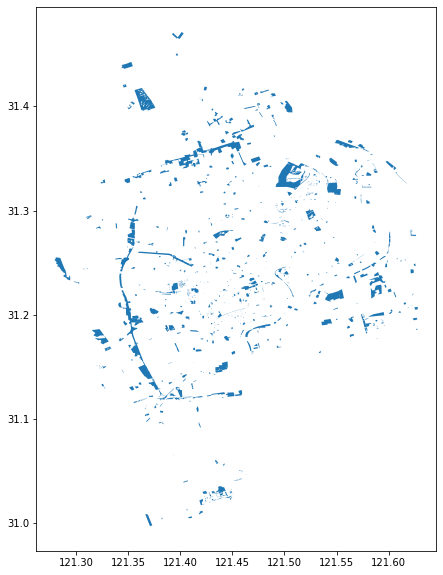

In [16]:
shanghai_gdf.plot(figsize=(15,10))

In [18]:
neighborhoods_gdf['green_area'] = 0.0

for i,poly in neighborhoods_gdf.iterrows():
    for park_poly in shanghai_gdf['geometry']:
        if poly['new_geometry'].intersects(park_poly):
            try:
                neighborhoods_gdf.at[i, "green_area"] += poly['new_geometry'].intersection(park_poly).area
                #print(neighborhoods_gdf.at[i, "green_area"],poly['new_geometry'].intersection(park_poly).area)
            except:
                pass

TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point 121.4382551800289 31.034923074373051 at 121.4382551800289 31.034923074373051
TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point 121.55243513399675 31.222968306734344 at 121.55243513399675 31.222968306734344
TopologyException: Input geom 1 is invalid: Self-intersection at or near point 121.3523846392448 31.271477514860791 at 121.3523846392448 31.271477514860791
TopologyException: Input geom 1 is invalid: Self-intersection at or near point 121.3523846392448 31.271477514860791 at 121.3523846392448 31.271477514860791
TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point 121.50943061785756 31.321313385611219 at 121.50943061785756 31.321313385611219
TopologyException: Input geom 1 is invalid: Ring Self-intersection at or near point 121.50943061785756 31.321313385611219 at 121.50943061785756 31.321313385611219
TopologyException: Input geom 1 is inv

In [19]:
neighborhoods_gdf['green_area_proportion'] = neighborhoods_gdf['green_area']/neighborhoods_gdf['new_geometry'].area

In [20]:
neighborhoods_gdf[neighborhoods_gdf['green_area_proportion']>0]

,new_geometry,green_area,green_area_proportion
35,"POLYGON ((121.4435559593832 31.00937196587229,...",7.627039e-05,0.026719
47,"POLYGON ((121.3873373874259 31.03990983938138,...",1.077160e-06,0.000759
48,"POLYGON ((121.4236004365234 31.07338884677493,...",3.590252e-06,0.001591
50,"POLYGON ((121.4578856607054 31.10380264639462,...",3.736795e-05,0.010517
53,"POLYGON ((121.460623779815 31.11422181966329, ...",5.755328e-05,0.083765
57,"POLYGON ((121.3895943835079 31.13058986527315,...",1.171583e-04,0.064768
60,"POLYGON ((121.4069919810415 31.14253885418503,...",1.014359e-04,0.041333
61,"POLYGON ((121.4238264115274 31.14864106248262,...",2.264482e-06,0.006688
62,"POLYGON ((121.4539230372866 31.15021548629118,...",7.461167e-05,0.134284
66,"POLYGON ((121.3819808632442 31.15897292442907,...",3.281975e-06,0.006219


In [22]:
neighborhoods_gdf.to_pickle('../df/green_spaces.pickle')